In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import datetime as dt

In [2]:
# создаем массив дат
start_date = dt.datetime(2019, 1, 1)
end_date = dt.datetime(2022, 1, 1)
dates = pd.date_range(start_date, end_date, freq='D')

# преобразуем даты в unix формат
unix_dates = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# вычисляем цены по формуле sin(x) с периодом в неделю
prices = np.sin(2*np.pi*unix_dates/(7 * 24 * 60 * 60))

# создаем таблицу
df = pd.DataFrame({'Date': dates, 'Price': prices})

# выводим первые 5 строк таблицы
print(df.head())

        Date         Price
0 2019-01-01 -9.749279e-01
1 2019-01-02 -7.818315e-01
2 2019-01-03 -7.897092e-13
3 2019-01-04  7.818315e-01
4 2019-01-05  9.749279e-01


In [3]:
unix_dates

Int64Index([1546300800, 1546387200, 1546473600, 1546560000, 1546646400,
            1546732800, 1546819200, 1546905600, 1546992000, 1547078400,
            ...
            1640217600, 1640304000, 1640390400, 1640476800, 1640563200,
            1640649600, 1640736000, 1640822400, 1640908800, 1640995200],
           dtype='int64', length=1097)

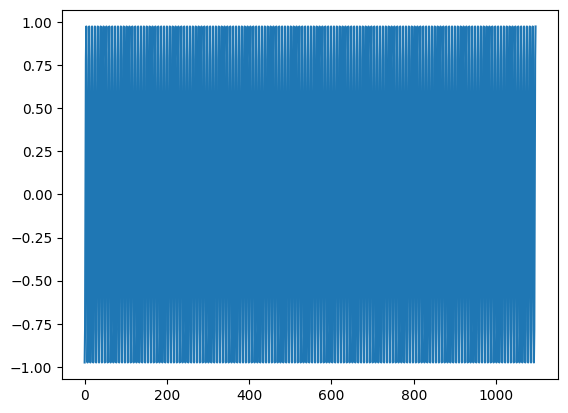

In [4]:
plt.plot(df["Price"])

In [5]:
train_data = df.iloc[-365*2:-200] # Используем данные за последние 2 года кроме последних 30 дней для обучения модели
test_data = df.iloc[-200:] # Последние 30 дней используем для проверки точности предсказаний

model = auto_arima(train_data['Price'], seasonal=True, m=365, stepwise=False, n_jobs=-1, maxiter=50)
predictions = model.predict(n_periods=len(test_data))

test_data['Predictions'] = predictions

print(test_data[['Date', 'Price', 'Predictions']])